#### Import moduldes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

pd.set_option('display.max_columns', None)

#### Load the data provided

In [2]:
Train = pd.read_csv("Train.csv")

In [3]:
Train.head()

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win
1,2016-09-14,1,12.0,ID_T7H1XN5Z,Andromeda,Antennae,Draw
2,2016-12-12,1,13.0,ID_O1P9FGN4,Andromeda,Butterfly,Away win
3,2017-01-25,1,14.0,ID_TR5M4KQV,Andromeda,Cigar,Away win
4,2016-08-24,1,15.0,ID_EOIECRE2,Andromeda,Circinus,Home Win


In [4]:
Test = pd.read_csv("Test.csv")

In [5]:
Test.head()

,Date,Season,Match_ID,Game_ID,Home Team,Away Team
0,2018-12-08,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7
1,2018-09-11,3,18.0,ID_H49BIKG7,Cosmos Redshift 7,Tadpole
2,2018-09-25,3,32.0,ID_PO6SP4VA,Cosmos Redshift 7,Medusa Merger
3,2018-10-02,3,40.0,ID_MZRCNBAQ,Cartwheel,Cosmos Redshift 7
4,2018-12-20,3,123.0,ID_CV9VOLIU,Cosmos Redshift 7,Needle


In [6]:
game_statistics = pd.read_csv("game_statistics.csv")

/var/folders/v5/s0zs7tln6bvgd_7p334kjdjr0000gn/T/ipykernel_51738/2395892949.py:1: DtypeWarning: Columns (17,18,22) have mixed types. Specify dtype option on import or set low_memory=False.
  game_statistics = pd.read_csv("game_statistics.csv")


In [7]:
game_statistics.head()

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,Ryoichi,Backward,0.0,0.0,1.0,0.0,1.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,Ryoichi,Backward,0.0,0.0,0.0,1.0,1.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
Train.shape, Test.shape, game_statistics.shape

((412, 7), (234, 6), (2428101, 25))

### Data EDA and Visualisation.

- Lets analyze the data provided by anaswering some few questions

#### How many seasons are in train and test ?

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='count'>

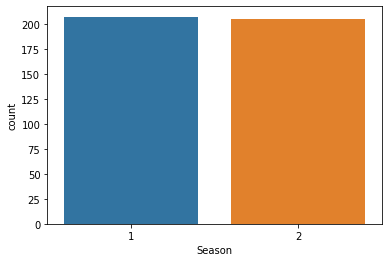

In [9]:
sns.countplot(Train["Season"])

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='count'>

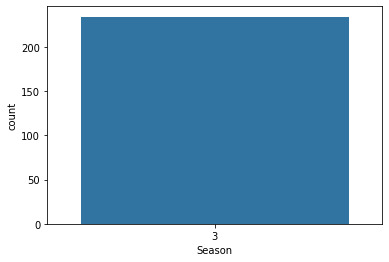

In [10]:
sns.countplot(Test["Season"])

- We can see that 2 seasons are provided in the training data while one season is provided in the the test

#### How many unique match IDs are provided?

- From a football perspective, can you find out what's a match, are matches specific to every season?

In [11]:
Train.Match_ID.nunique()

224

In [12]:
Test.Match_ID.nunique()

213

#### How many games were played in train seasons and test seasons?

In [13]:
Train.Game_ID.nunique()

412

In [14]:
Test.Game_ID.nunique()

234

#### How many teams were away and home?

In [15]:
Train["Home Team"].nunique()

19

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Home Team', ylabel='count'>

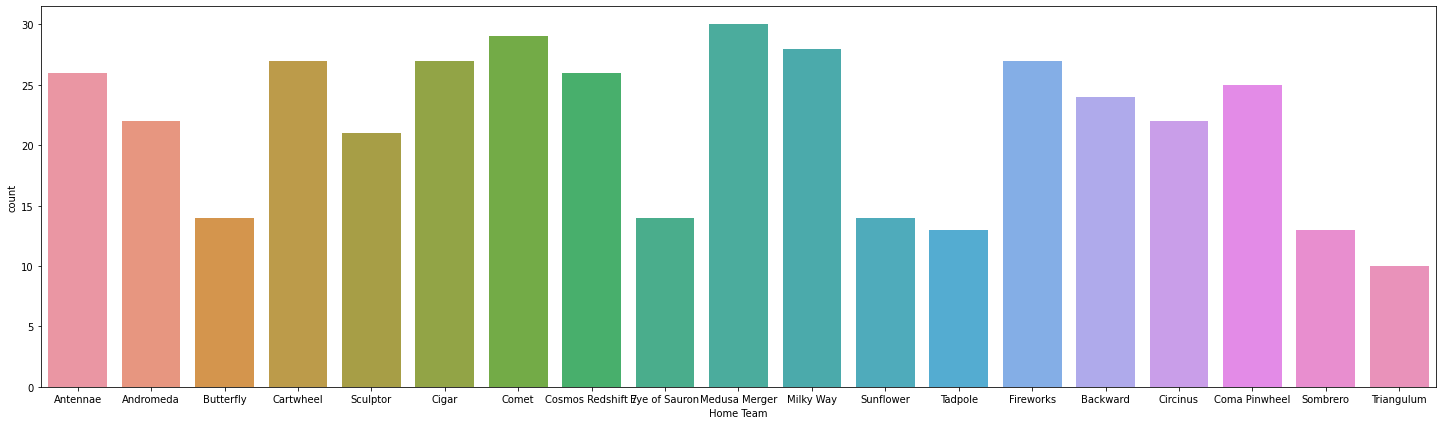

In [16]:
plt.figure(figsize=(25,7))
sns.countplot(Train["Home Team"])

In [17]:
Train["Away Team"].nunique()

19

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Away Team', ylabel='count'>

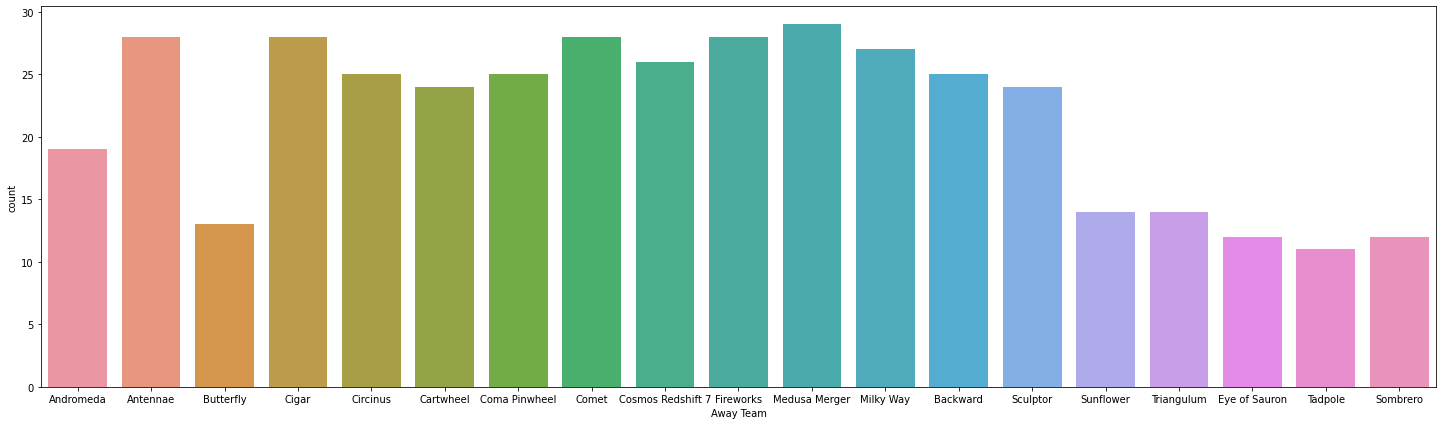

In [18]:
plt.figure(figsize=(25,7))
sns.countplot(Train["Away Team"])

In [19]:
Test["Home Team"].nunique()

16

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Home Team', ylabel='count'>

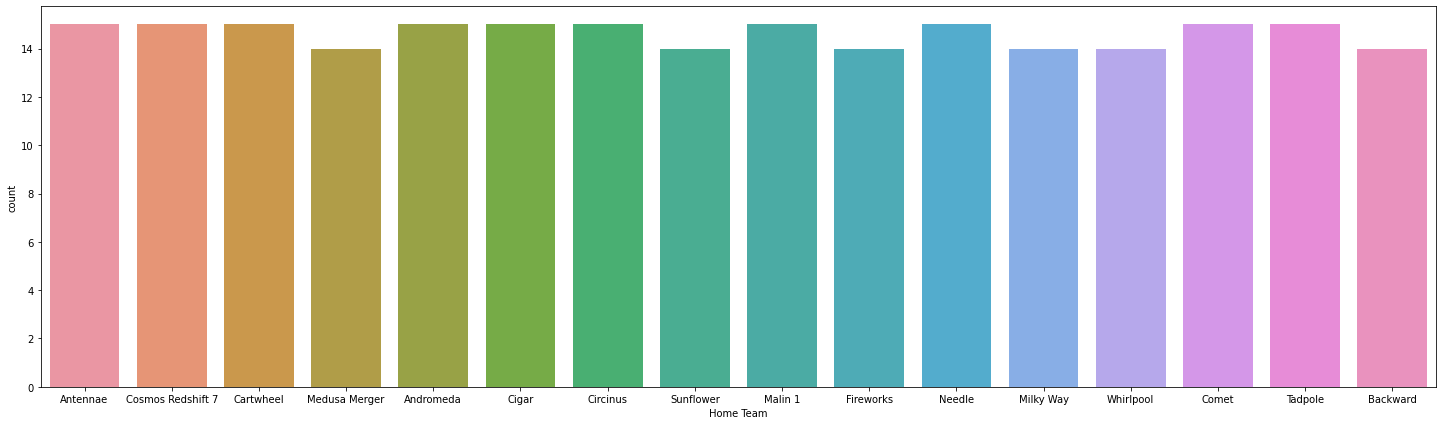

In [20]:
plt.figure(figsize=(25,7))
sns.countplot(Test["Home Team"])

In [21]:
Test["Away Team"].nunique()

16

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Away Team', ylabel='count'>

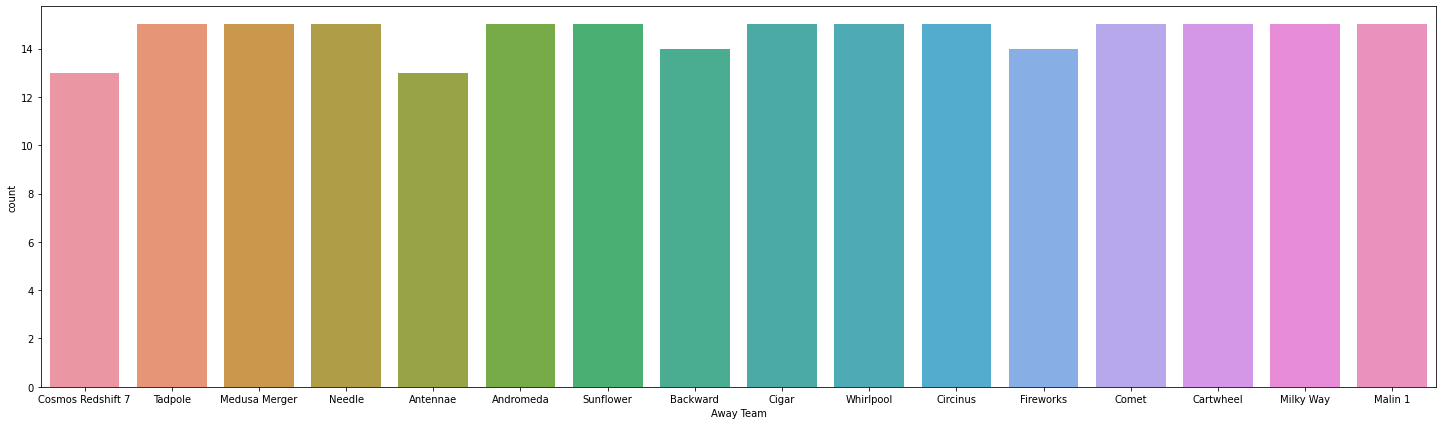

In [22]:
plt.figure(figsize=(25,7))
sns.countplot(Test["Away Team"])

- We can see that the number of teams in Home and away are equal in both cases, however the test count of the teams is more balance than the train, could this be as a result of 1 season in test and 2 seasons in the train? For the train can you countplot per season?

#### Did the team Win, Lose or Draw?

- Let's look at the target column, the reason for creating our machine leaning model, the goal of every footbal game is to determine the winner

In [23]:
Train["Score"].nunique()

3

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='count'>

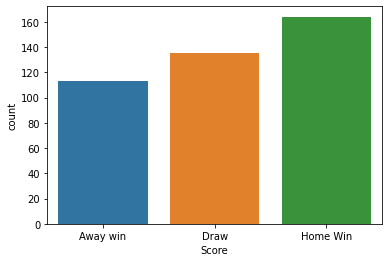

In [24]:
sns.countplot(Train["Score"])

We have 3 classifications, did the away team win, did both teams draw or did the home team win? We can see that in most cases the home team won. There's much more you can do with this field:

    - Look at every team, the number of games played? did they win or lose, are most of their wins during home or away game?

- **You can do more EDAs on the game statistics file**

### Feature Engineering and Modelling

#### Game statistics 

- This file shows how the game was played from start to end, the actions of the game, which player was it passed to etc.
- We will need to merge this with the train and test data provided.

In [25]:
Train["Train"] = 1
Test["Train"]= 0

train_test = pd.concat([Train, Test])

In [26]:
train_test.shape

(646, 8)

In [27]:
train_test.head(3)

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score,Train
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win,1
1,2016-09-14,1,12.0,ID_T7H1XN5Z,Andromeda,Antennae,Draw,1
2,2016-12-12,1,13.0,ID_O1P9FGN4,Andromeda,Butterfly,Away win,1


In [28]:
game_statistics.head(3)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,Ryoichi,Backward,0.0,0.0,1.0,0.0,1.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
all_data = game_statistics.merge(train_test, on="Game_ID")

In [30]:
all_data.shape

(2428101, 32)

In [31]:
all_data.head()

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value,Date,Season,Match_ID,Home Team,Away Team,Score,Train
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,Ryoichi,Backward,0.0,0.0,1.0,0.0,1.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,Ryoichi,Backward,0.0,0.0,0.0,0.0,0.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,Ryoichi,Backward,0.0,0.0,0.0,1.0,1.0,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1


#### How to deal with column that are categorical?

- There are various ways of doing this:-

    - One hot encoding 
    - label encoding etc
    
    
- In this starter nb, I'll use label encoding, you can try other other ways

In [32]:
le = preprocessing.LabelEncoder()

all_data["Game_ID"] = le.fit_transform(all_data["Game_ID"])
game_mapping = dict(zip(le.classes_, range(len(le.classes_))))
all_data["Player_ID"] = le.fit_transform(all_data["Player_ID"])

- For the teams ensure they are transformed the same, you do not want a scenario where team Circinus is mapped as 1 on one column and mapped as 2 on another column, this will be inconsistent and will affect the model results

In [33]:
all_data["Team"] = le.fit_transform(all_data["Team"])

mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [34]:
mapping

{'Andromeda': 0,
 'Antennae': 1,
 'Backward': 2,
 'Butterfly': 3,
 'Cartwheel': 4,
 'Cigar': 5,
 'Circinus': 6,
 'Coma Pinwheel': 7,
 'Comet': 8,
 'Cosmos Redshift 7': 9,
 'Eye of Sauron': 10,
 'Fireworks': 11,
 'Malin 1': 12,
 'Medusa Merger': 13,
 'Milky Way': 14,
 'Needle': 15,
 'Sculptor': 16,
 'Sombrero': 17,
 'Sunflower': 18,
 'Tadpole': 19,
 'Triangulum': 20,
 'Whirlpool': 21}

In [35]:
all_data["Opposition_Team"] = all_data["Opposition_Team"].apply(lambda x: mapping[x])
all_data["Home Team"] = all_data["Home Team"].apply(lambda x: mapping[x])
all_data["Away Team"] = all_data["Away Team"].apply(lambda x: mapping[x])

In [36]:
all_data["Action"] = le.fit_transform(all_data["Action"])
all_data["Half"] = le.fit_transform(all_data["Half"])
all_data["Manager"] = le.fit_transform(all_data["Manager"])

- For this nb, I'll drop most of the columns that have alot on NAN values, you can choose to fill those NAN values since the columns might be worth including in the modeling

In [37]:
all_data.drop(["next_player", "next_action", "next_x", "next_y", "event_id", "next_team",
               "next_event_id", "xt_value", "Date"], axis=1, inplace=True)

In [38]:
Train =all_data[all_data["Train"] == 1]
Train.drop("Train", axis=1, inplace=True)
Test = all_data[all_data["Train"] == 0]
Test.drop(["Train", "Score"], axis=1, inplace=True)
Test = Test.reset_index(drop=True)

/var/folders/v5/s0zs7tln6bvgd_7p334kjdjr0000gn/T/ipykernel_51738/3684393416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train.drop("Train", axis=1, inplace=True)
/var/folders/v5/s0zs7tln6bvgd_7p334kjdjr0000gn/T/ipykernel_51738/3684393416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.drop(["Train", "Score"], axis=1, inplace=True)


In [39]:
Train.shape, Test.shape

((1626003, 22), (802098, 21))

In [40]:
Train.head(2)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Season,Match_ID,Home Team,Away Team,Score
0,645,536,1.0,52.5,34.0,6,2,0,52,2,0.0,0.0,1.0,0.0,1.0,0.03,0.37,2,39.0,2,6,Home Win
1,645,536,2.0,52.5,34.0,6,38,0,52,2,0.0,0.0,0.0,0.0,0.0,0.03,0.37,2,39.0,2,6,Home Win


In [41]:
Test.head(2)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Season,Match_ID,Home Team,Away Team
0,640,106,1.0,52.5,34.0,14,2,0,40,18,0.0,0.0,1.0,0.0,1.0,0.68,1.02,3,158.0,18,14
1,640,106,2.0,52.5,34.0,14,38,0,40,18,0.0,0.0,0.0,0.0,0.0,0.68,1.02,3,158.0,18,14


In [42]:
# to avoid nans, will map score onli in the training set
Train["Score"] = le.fit_transform(Train["Score"])
score_mapping = dict(zip(le.classes_, range(len(le.classes_))))

/var/folders/v5/s0zs7tln6bvgd_7p334kjdjr0000gn/T/ipykernel_51738/41342390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Score"] = le.fit_transform(Train["Score"])


In [43]:
score_mapping

{'Away win': 0, 'Draw': 1, 'Home Win': 2}

### Modelling

- This is a classification problem that require using classification machine learning algorithms

In [44]:
X = Train.drop(["Score"], axis=1)
y = Train["Score"]

In [45]:
clf = RandomForestClassifier()
clf.fit(X, y)

RandomForestClassifier()

- Some of the rows in test are null, I chose to fill all with 0z but you need to look at each case/column and deal with it differently

In [46]:
Test.Game_ID.nunique()

234

In [47]:
# Test = Test[~Test.Shots.isnull()]
Test = Test.fillna(0)

In [48]:
Test.Game_ID.nunique()

234

### Predict on the test set

In [49]:
test_predictions  = clf.predict(Test)

In [50]:
Test["Score"] = test_predictions

In [51]:
Test["Score"].unique()

array([0, 1, 2])

In [52]:
score_mapping = {value:key for key, value in score_mapping.items()}
Test["Score"] = Test["Score"].apply(lambda x: score_mapping[x])

In [53]:
game_mapping = {value:key for key, value in game_mapping.items()}
Test["Game_ID"] = Test["Game_ID"].apply(lambda x: game_mapping[x])

In [54]:
Test["Score"].unique()

array(['Away win', 'Draw', 'Home Win'], dtype=object)

In [55]:
Test.head(2)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,Shots,SoT,Accurate passes,Inaccurate passes,Passes,Start_minutes,End_minutes,Season,Match_ID,Home Team,Away Team,Score
0,ID_ZUPS2JD2,106,1.0,52.5,34.0,14,2,0,40,18,0.0,0.0,1.0,0.0,1.0,0.68,1.02,3,158.0,18,14,Away win
1,ID_ZUPS2JD2,106,2.0,52.5,34.0,14,38,0,40,18,0.0,0.0,0.0,0.0,0.0,0.68,1.02,3,158.0,18,14,Away win


In [56]:
submit = Test[["Game_ID", "Score"]]

- Here I'm randomly selecting the score for every unique game ID, you can choose to be creative and look a the prediction with multiple rows.

In [57]:
submit.drop_duplicates(subset = ["Game_ID"], inplace=True)

/var/folders/v5/s0zs7tln6bvgd_7p334kjdjr0000gn/T/ipykernel_51738/1230856750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit.drop_duplicates(subset = ["Game_ID"], inplace=True)


In [58]:
submit = submit.reset_index(drop=True)

In [59]:
submit.shape

(234, 2)

In [60]:
submit.head()

,Game_ID,Score
0,ID_ZUPS2JD2,Away win
1,ID_ZTDZNU6I,Draw
2,ID_ZRZC49M1,Home Win
3,ID_ZQOB9ZQL,Draw
4,ID_ZMO6O1V6,Away win


In [61]:
submit.to_csv("submission.csv", index=False)

## - To Do,

1. Try cross validation, be very careful of how you split the data as you can see the test set has a complete different season compared to train
2. The date column might be useful 
3. Try not to drop many columns :)


## Good Luck !!!!